In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import os

In [28]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

file_path = '/Users/asger/Documents/GitHub/Deep_Learning_Techniques/Master/Data/macrovariables_featured.csv'
dataframe = pd.read_csv(file_path)
dataset = dataframe.values
dataset = dataset[:, 1:]
dataset = dataset.astype('float32')

percent_change = dataset[:,:1]

In [29]:
# Define a function to categorize the percent change
def categorize_percent_change(percent_change):
    if percent_change > 0.001:
        return 0  # Price rises
    elif percent_change < -0.001:
        return 2  # Price falls
    else:
        return 1  # Price stays the same

# Apply the function to y_percent_change to get the categories
y_categories = np.array([categorize_percent_change(pc) for pc in percent_change])

# normalize the dataset - makes the range for all variables to be between 0 and 1 adn then applies it to the dataset
dataset = dataset[:, 1:]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
###############
# Function to convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX = []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
    return np.array(dataX)

# Look-back period
look_back = 15

# Create dataset
dataX = create_dataset(dataset, look_back)

# Reshape input to be [samples, time steps, features]
dataX = np.reshape(dataX, (dataX.shape[0], look_back, dataset.shape[1]))

###############
# data
X = dataX
y = y_categories[look_back:]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [31]:
# Build the model with Dropout layers
model = Sequential([
    LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(3, activation='softmax')  # Output layer with softmax activation for 3 categories
])

In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
60/60 [==============================] - 4s 32ms/step - loss: 1.0290 - accuracy: 0.4053 - val_loss: 1.0392 - val_accuracy: 0.4373
Epoch 2/20
60/60 [==============================] - 1s 17ms/step - loss: 1.0216 - accuracy: 0.4142 - val_loss: 1.0369 - val_accuracy: 0.4468
Epoch 3/20
60/60 [==============================] - 1s 17ms/step - loss: 1.0208 - accuracy: 0.4177 - val_loss: 1.0353 - val_accuracy: 0.4362
Epoch 4/20
60/60 [==============================] - 1s 17ms/step - loss: 1.0231 - accuracy: 0.4116 - val_loss: 1.0376 - val_accuracy: 0.4089
Epoch 5/20
60/60 [==============================] - 1s 17ms/step - loss: 1.0223 - accuracy: 0.4190 - val_loss: 1.0371 - val_accuracy: 0.4078
Epoch 6/20
60/60 [==============================] - 1s 17ms/step - loss: 1.0190 - accuracy: 0.4227 - val_loss: 1.0378 - val_accuracy: 0.4299
Epoch 7/20
60/60 [==============================] - 1s 18ms/step - loss: 1.0208 - accuracy: 0.4095 - val_loss: 1.0360 - val_accuracy: 0.4162
Epoch 8/20
60

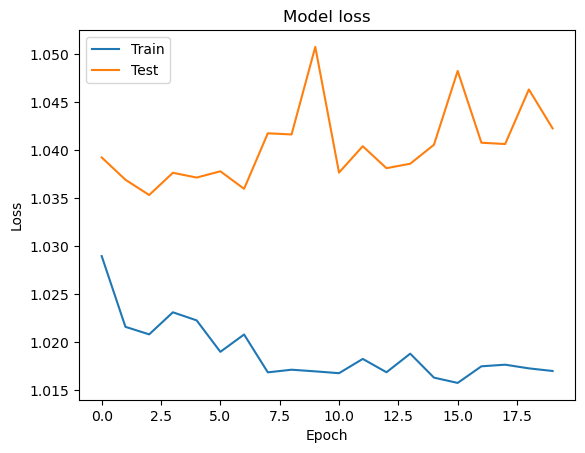

In [33]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()